# Codice per la parte del classificatore Bayesiano
Vediamo di importare tutto il necessario.

In [1]:
from tqdm import tqdm

import numpy as np
np.random.seed(0)  # keep the random seed of numpy fixed

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from time import time

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.metrics import accuracy_score

from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer
from sklearn import datasets
from sklearn.datasets import load_wine

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

from sklearn.naive_bayes import GaussianNB as GNB

from ISLP import load_data

# Configure matplotlib
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Ora utilizzimao il dataset breast_cancer, che presenta dei dati relativi a uno studio clinico sul cancro al seno. Presenta 569 dati su pazienti soggette al cancro al seno, ognuna con 30 attributi e con relativa classe che misura 0 per un cancro maligno e 1 per benigno. Ne prendiamo i primi 5 attributi e ne facciamo una regressione logistica. In particolare poi possiamo assegnare a ogni osservazione la classe 1 quando la probabilità supera una certa soglia: lavoriamo cercando di tenere un numero basso di falsi negativi (cerchiamo di essere sicuri che se comunichiamo a una paziente che il cancro è beningno effettivamente lo sia). Per fare ciò possiamo cambiare il livello di soglia.

In [2]:
cancer = load_breast_cancer()

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

0.9349736379613357
La matrice di confusione iniziale è:
[[189  23]
 [ 14 343]]
L'accuratezza iniziale è data da: 0.9349736379613357


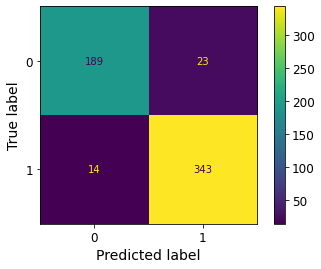

La matrice di confusione con soglia 0.8 è:
[[203   9]
 [ 39 318]]
L'accuratezza con soglia è data da: 0.9156414762741653


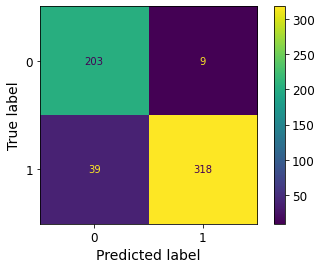

In [6]:
X_cancer = cancer.data[:, (1, 2, 3, 4, 5)]
y_cancer = cancer.target

logreg_cancer = LogisticRegression(penalty = None, solver = 'newton-cholesky').fit(X_cancer, y_cancer)

y_pred_cancer = logreg_cancer.predict(X_cancer)
print(accuracy_score(y_cancer, y_pred_cancer))

matrix_cancer = confusion_matrix(y_cancer, y_pred_cancer)
acc_cancer = accuracy_score(y_cancer, y_pred_cancer)
print(f"La matrice di confusione iniziale è:\n{matrix_cancer}")
print(f"L'accuratezza iniziale è data da: {acc_cancer}")
#plt.title("Matrice di confusione con soglia 0.5")
ConfusionMatrixDisplay(confusion_matrix = matrix_cancer).plot()
plt.show()

prob_cancer = logreg_cancer.predict_proba(X_cancer)
# print(prob_cancer)
soglia = 0.8
y_pred_soglia = np.zeros_like(y_cancer)
for i in range(len(y_cancer)):
    if prob_cancer[i, 1] > soglia:
        y_pred_soglia[i] = 1

#print(y_pred_soglia)
#print(y_cancer)

matrix_cancer_soglia = confusion_matrix(y_cancer, y_pred_soglia)
acc_soglia = accuracy_score(y_pred_soglia, y_cancer)
print(f"La matrice di confusione con soglia {soglia} è:\n{matrix_cancer_soglia}")
print(f"L'accuratezza con soglia è data da: {acc_soglia}")
#plt.title(f"Matrice di confusione con soglia {soglia}")
ConfusionMatrixDisplay(confusion_matrix = matrix_cancer_soglia).plot()
plt.show()

Proviamo invece con il dataset del Default che ha più dati. Importiamo tutto il necessario.

In [9]:
def calcola_acc(X_input, y_input, soglia = [0.3, 0.8]):
    
    X_train, X_val, y_train, y_val = train_test_split(X_input, y_input, train_size = 0.7)
    logreg_input = LogisticRegression(penalty = None, solver = 'newton-cholesky').fit(X_train, y_train)
    y_pred_input = logreg_input.predict(X_val)
    acc_input = accuracy_score(y_val, y_pred_input)
    print(f"L'accuratezza con soglia base è data da: {acc_input}")
    matrix_input = confusion_matrix(y_val, y_pred_input)
    ConfusionMatrixDisplay(confusion_matrix = matrix_input).plot()
    plt.show()
    
    prob_input = logreg_input.predict_proba(X_val)
    for i in range(len(soglia)):
        y_pred_soglia = np.zeros_like(y_val)
        for k in range(len(y_val)):
            if (prob_input[k, 1] > soglia[i]):
                y_pred_soglia[k] = 1
        matrix_soglia = confusion_matrix(y_val, y_pred_soglia)        
        acc_soglia = accuracy_score(y_val, y_pred_soglia)
        print(f"L'accuratezza con soglia {soglia[i]} è data da: {acc_soglia}")
        ConfusionMatrixDisplay(confusion_matrix = matrix_soglia).plot()
        plt.show()


L'accuratezza con soglia base è data da: 0.974


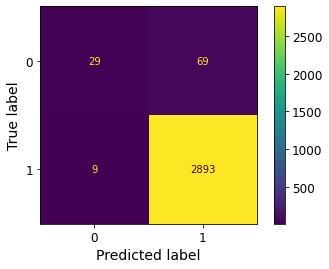

L'accuratezza con soglia 0.2 è data da: 0.9706666666666667


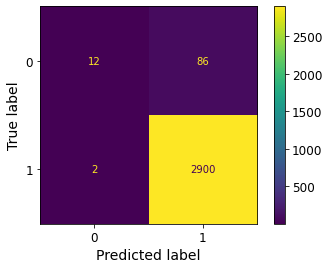

L'accuratezza con soglia 0.3 è data da: 0.9716666666666667


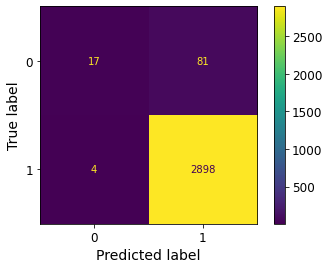

L'accuratezza con soglia 0.4 è data da: 0.9723333333333334


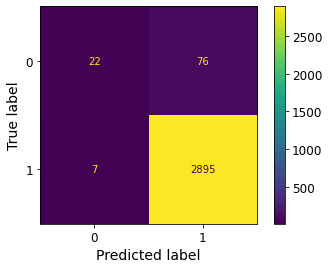

L'accuratezza con soglia 0.5 è data da: 0.974


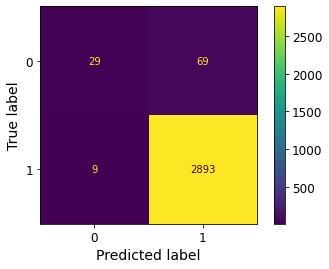

L'accuratezza con soglia 0.6 è data da: 0.974


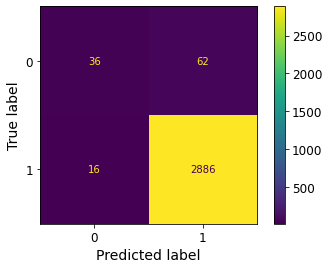

L'accuratezza con soglia 0.7 è data da: 0.968


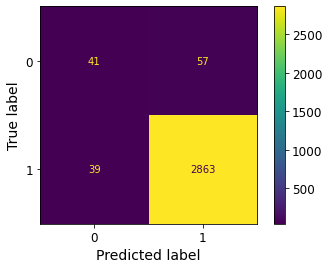

L'accuratezza con soglia 0.8 è data da: 0.9573333333333334


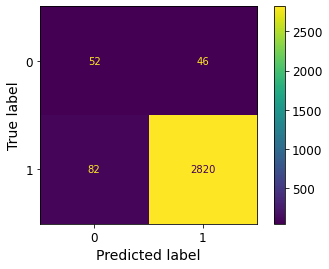

In [10]:
default = load_data('Default')

#X_def = default.loc[:, ("balance", "income")]
def_array = default.values
X_def = def_array[:, (2, 3)]
y_def = (def_array[:, 0] == 'No').astype(int)

calcola_acc(X_def, y_def, soglia = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

L'accuratezza con soglia base è data da: 0.9473684210526315


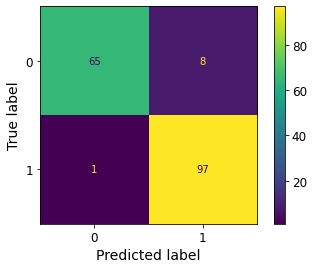

L'accuratezza con soglia 0.2 è data da: 0.9005847953216374


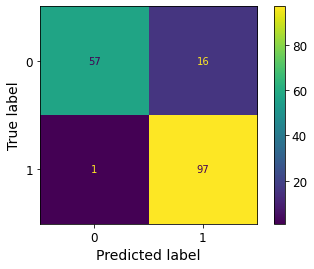

L'accuratezza con soglia 0.3 è data da: 0.9298245614035088


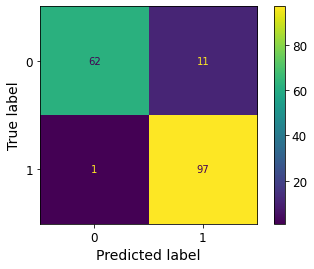

L'accuratezza con soglia 0.4 è data da: 0.9473684210526315


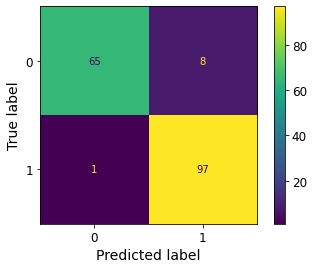

L'accuratezza con soglia 0.5 è data da: 0.9473684210526315


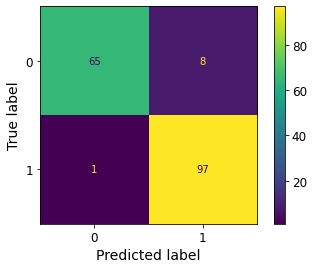

L'accuratezza con soglia 0.6 è data da: 0.935672514619883


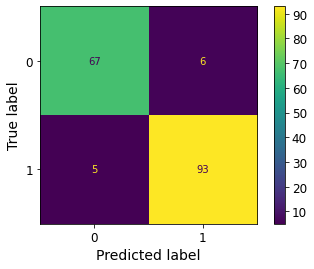

L'accuratezza con soglia 0.7 è data da: 0.935672514619883


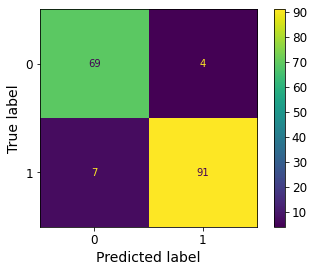

L'accuratezza con soglia 0.8 è data da: 0.9181286549707602


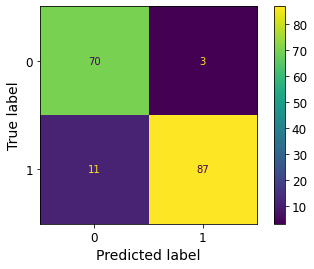

In [11]:
calcola_acc(X_cancer, y_cancer, soglia = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])